In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
train = pd.read_parquet("../data/train.parquet")
test = pd.read_parquet("../data/test.parquet")
campaigns = pd.read_parquet("../data/campaigns_meta.parquet")
categories = pd.read_parquet("../data/categories.parquet")

### Train / test features:
platform_id: id платформы (Android, Ios и т.п.)  
user_id: id Пользователя   
adv_campaign_id: id рекламной компании   
target: клик / не клик  
banner_code: код баннера  
adv_creative_id: индификатор креатива  
event_date: date Дата показа рекламной кампании пользователю  
is_main: boolean True - показ рекламы был осуществлен с главной страницы  

### Categories features:
microcat_id: id микрокатегории   
level_id: id уровня в дереве микрокатегорий   
parent_microcat_id: id родительской микрокатегории  
logcat_id: id логической категории   
vertical_id: id вертикали   
category_id: id категории   

### Campaigns features:
adv_campaign_id: id рекламной компании  
start_date: date дата начала рекламной компании  
end_date: date дата завершения рекламной компании   
goal_cost: цена за клик на рекламу  
goal_budget: общий бюджет рекламной компании   
logcat_id: id логической категории товаров из рекламной кампании  
location_ids: id локации, на которую рекламная компания распространяется   


In [2]:
train.sample(10)

,user_id,adv_campaign_id,platform_id,adv_creative_id,event_date,banner_code,is_main,target
108172661,1165696,150,3,3950,2024-09-14,6,True,0
13669039,730836,3790,3,3720,2024-09-18,6,True,0
109450084,1230611,1851,2,1036,2024-09-20,8,True,0
114221851,42110,528,2,230,2024-09-07,8,True,0
43327047,2692971,144,2,2449,2024-09-11,8,True,0
104577964,3103325,253,2,2699,2024-09-12,8,True,0
73498743,2767772,1830,4,2593,2024-09-21,4,True,0
92513111,1121530,2551,2,2563,2024-09-03,8,True,0
15608996,847855,2541,3,4157,2024-09-09,6,True,0
71107038,667818,2559,4,3074,2024-09-20,4,True,0


In [10]:
train.shape

(114741035, 8)

In [11]:
test.shape

(1983287, 7)

In [2]:
print("\nПропущенные значения в train:")
print(train.isnull().sum())


Пропущенные значения в train:
user_id            0
adv_campaign_id    0
platform_id        0
adv_creative_id    0
event_date         0
banner_code        0
is_main            0
target             0
dtype: int64


In [3]:
campaigns.sample(10)

,adv_campaign_id,start_date,end_date,goal_cost,goal_budget,location_id,logcat_id
75,2050,2024-09-16,2024-09-22,4.148386,4851.169022,7,51
3169,1969,2024-09-20,2024-09-26,3.657015,104.770999,41,50
540,596,2024-09-12,2024-09-18,8.240600,13359.602169,60,18
99,1782,2024-08-15,2024-08-30,2.492355,2527.660195,66,35
1591,766,2024-09-19,2024-09-25,3.663206,3501.719823,76,18
784,2716,2024-09-17,2024-09-24,3.614845,4191.706766,63,65
3388,991,2024-09-16,2024-09-22,0.988679,27.429941,53,48
2772,2995,2024-09-07,2024-09-17,4.166414,440.831324,9,7
1700,25,2024-09-11,2024-09-19,5.803481,3335.119827,30,56
1193,3914,2024-09-18,2024-09-24,3.056847,6440.670928,7,40


In [13]:
categories.shape

(25891, 6)

In [3]:
print("\nПропущенные значения в campaigns:")
print(campaigns.isnull().sum())


Пропущенные значения в campaigns:
adv_campaign_id    0
start_date         0
end_date           0
goal_cost          0
goal_budget        0
location_id        0
logcat_id          0
dtype: int64


In [14]:
campaigns.shape

(4031, 7)

In [4]:
categories.sample(10)

,microcat_id,level_id,parent_microcat_id,logcat_id,vertical_id,category_id
6200,8999,5.0,10994.0,55.0,5.0,4.0
13729,14858,7.0,44363.0,12.0,3.0,3.0
23518,28375,5.0,8122.0,37.0,5.0,4.0
23984,38215,6.0,34373.0,18.0,5.0,4.0
18716,3094,7.0,33842.0,5.0,8.0,4.0
16110,22746,6.0,46533.0,12.0,3.0,3.0
25149,4070,6.0,38959.0,65.0,8.0,5.0
21440,5478,6.0,25271.0,18.0,5.0,4.0
18331,26748,6.0,6359.0,5.0,8.0,4.0
18225,10644,5.0,33947.0,43.0,7.0,1.0


In [4]:
print("\nПропущенные значения в categories:")
print(categories.isnull().sum())


Пропущенные значения в categories:
microcat_id           0
level_id              1
parent_microcat_id    3
logcat_id             8
vertical_id           8
category_id           4
dtype: int64


KeyboardInterrupt: 

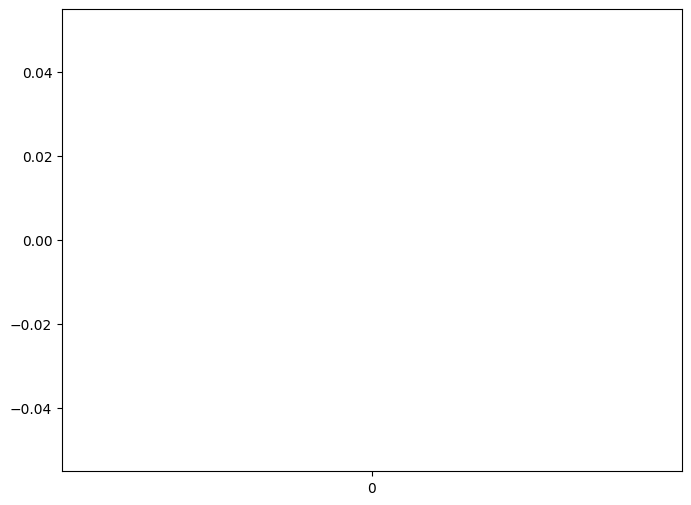

In [7]:
# Распределение целевой переменной
plt.figure(figsize=(8, 6))
sns.countplot(data=train, x='target')
plt.title('Распределение кликов/не кликов')
plt.show()

# Процентное соотношение
print("Процент кликов:", (train['target'].mean() * 100).round(2), "%")

In [8]:
# Конвертируем даты
train['event_date'] = pd.to_datetime(train['event_date'])
campaigns['start_date'] = pd.to_datetime(campaigns['start_date'])
campaigns['end_date'] = pd.to_datetime(campaigns['end_date'])

# Анализ по дням
daily_clicks = train.groupby('event_date')['target'].agg(['count', 'mean'])
plt.figure(figsize=(12, 6))
plt.plot(daily_clicks.index, daily_clicks['mean'])
plt.title('Динамика CTR по дням')
plt.xlabel('Дата')
plt.ylabel('CTR')
plt.xticks(rotation=45)
plt.show()

KeyboardInterrupt: 